In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/spam.csv", encoding = 'latin-')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.duplicated().sum()

403

In [5]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()


0

In [6]:
df = df.rename(columns = {'v1': 'class',
'v2': 'Email_content'
})
df

,class,Email_content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
values = df['class'].value_counts()
values

class
ham     4516
spam     653
Name: count, dtype: int64

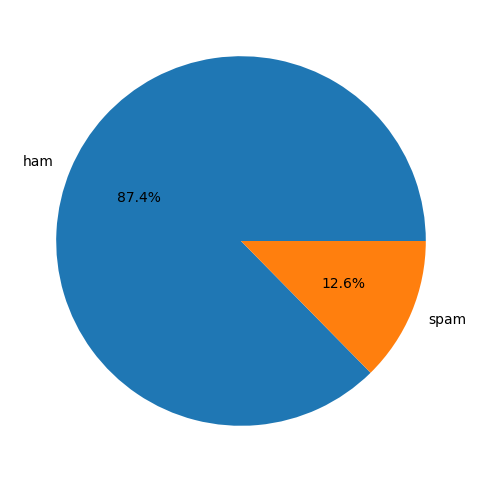

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.pie(df['class'].value_counts(), labels = ['ham', 'spam'], autopct="%0.1f%%")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class']) # fitting the data into LabelEncoder
df

,class,Email_content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
import nltk # natural language processing liberary
from nltk.stem.porter import PorterStemmer # for text stemming
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# calling the PorterStemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [18]:
df['Email_content'] = df['Email_content'].apply(transform_text) # applying function on the text column
df.head()

,class,Email_content
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # calling countvectorizer
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(df['Email_content']).toarray()
y = df['class'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = 2)

In [23]:
'''
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

target_class_undersample = 0
target_class_oversample = 1
undersampler = RandomUnderSampler(sampling_strategy={target_class_undersample: int((df[df['class']==0].shape[0])/2)},random_state=42) # undersample the majority class by half

smote = SMOTE(sampling_strategy={target_class_oversample: int((df[df['class']==0].shape[0])/2)},random_state=42) # oversample the minority class by half of the undersampled class

x_resampled, y_resampled = undersampler.fit_resample(X , y)

x_resampled, y_resampled = smote.fit_resample(x_resampled, y_resampled)

print(f'New class distribution after resampling: {y_resampled.value_counts()}')
'''

"\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.over_sampling import SMOTE\n\ntarget_class_undersample = 0\ntarget_class_oversample = 1\nundersampler = RandomUnderSampler(sampling_strategy={target_class_undersample: int((df[df['class']==0].shape[0])/2)},random_state=42) # undersample the majority class by half\n\nsmote = SMOTE(sampling_strategy={target_class_oversample: int((df[df['class']==0].shape[0])/2)},random_state=42) # oversample the minority class by half of the undersampled class\n\nx_resampled, y_resampled = undersampler.fit_resample(X , y)\n\nx_resampled, y_resampled = smote.fit_resample(x_resampled, y_resampled)\n\nprint(f'New class distribution after resampling: {y_resampled.value_counts()}')\n"

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy={1: (df[df['class']==0].shape[0])})

In [26]:
X_new , y_new = ros.fit_resample(X,y)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Support Vector Machines (SVM)
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel
svm_model.fit(X_new ,  y_new)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machines (SVM) Accuracy:", svm_accuracy)

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_new, y_new)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Trees Accuracy:", dt_accuracy)


Support Vector Machines (SVM) Accuracy: 0.9941972920696325
Decision Trees Accuracy: 0.9980657640232108


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for SVM
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

print("Support Vector Machines (SVM) Precision:", svm_precision)
print("Support Vector Machines (SVM) Recall:", svm_recall)
print("Support Vector Machines (SVM) F1-score:", svm_f1_score)

# Calculate precision, recall, and F1-score for Decision Trees
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

print("Decision Trees Precision:", dt_precision)
print("Decision Trees Recall:", dt_recall)
print("Decision Trees F1-score:", dt_f1_score)


Support Vector Machines (SVM) Precision: 0.9782608695652174
Support Vector Machines (SVM) Recall: 0.9782608695652174
Support Vector Machines (SVM) F1-score: 0.9782608695652174
Decision Trees Precision: 1.0
Decision Trees Recall: 0.9855072463768116
Decision Trees F1-score: 0.9927007299270074
